In [1]:
import pandas as pd
import numpy as np

In [2]:
from io import StringIO
import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [3]:
from src import text_normalizer
from os import listdir
from os.path import isfile, join
import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
stop_words = nltk.corpus.stopwords.words("spanish")

In [5]:
def pdf_to_text(path):
    '''Extract text from pdf documents
    '''

    manager = PDFResourceManager()
    retstr = StringIO()
    layout = LAParams(all_texts=False, detect_vertical=True)
    device = TextConverter(manager, retstr, laparams=layout)
    interpreter = PDFPageInterpreter(manager, device)
    with open(path, 'rb') as filepath:
        for page in PDFPage.get_pages(filepath, check_extractable=True):
            interpreter.process_page(page)
    text = retstr.getvalue()
    device.close()
    retstr.close()
    return text

In [6]:
mypath='dataset'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [8]:
text_files = []


for f in files:
    text = pdf_to_text('dataset\{}'.format(f))
    text_files.append(text)

In [9]:
text_files

['PÓLIZA DE ACCIDENTES PERSONALES / REEMBOLSO GASTOS MÉDICOS\n\nIncorporada al Depósito de Pólizas bajo el código POL120190177\n\nARTÍCULO 1°: REGLAS APLICABLES AL CONTRATO\nSe aplicarán al presente contrato de seguro las disposiciones contenidas en los artículos siguientes y las\nnormas legales de carácter imperativo establecidas en el título VIII, del Libro II, del Código de Comercio. Sin\nembargo, se entenderán válidas las estipulaciones contractuales que sean más beneficiosas para el\nasegurado o el beneficiario.\n\nARTÍCULO 2º: COBERTURA Y MATERIA ASEGURADA\nLa Compañía Aseguradora reembolsará al asegurado o pagará directamente al prestador de salud los\nGastos Médicos Razonables y Acostumbrados y Efectivamente Incurridos, una vez se haya otorgado y\npagado la cobertura del sistema de salud previsional, seguros complementarios u otros beneficios\ncontratados por el asegurado. Lo anterior, cuando al asegurado le ocurra un accidente durante la vigencia de\nesta póliza que demande su

In [10]:
##Limpieza del texto

text_files_clean = text_normalizer.normalize_corpus(text_files, stopwords=stop_words)


In [11]:
text_files_clean

['poliza accidentes personales reembolso gastos medicos incorporada deposito polizas bajo codigo pol articulo reglas aplicables contrato aplicaran presente contrato seguro disposiciones contenidas articulos siguientes normas legales caracter imperativo establecidas titulo viii libro ii codigo comercio embargo entenderan validas estipulaciones contractuales mas beneficiosas asegurado beneficiario articulo cobertura materia asegurada compania aseguradora reembolsara asegurado pagara directamente prestador salud gastos medicos razonables acostumbrados efectivamente incurridos vez otorgado pagado cobertura sistema salud previsional seguros complementarios u beneficios contratados asegurado anterior asegurado ocurra accidente vigencia poliza demande internacion hospitalaria gasto realice prestadores salud asegurador determine periodo duracion reembolso establezca condiciones particulares poliza inicia fecha ocurrencia accidente originados definiciones conceptos encuentran contenidos articul

In [ ]:
#1 - convertir a df
#2 - tokenizar

In [12]:
df_files_clean = pd.DataFrame(text_files_clean, columns=['doc'])
df_files_clean.head()

,doc
0,poliza accidentes personales reembolso gastos ...
1,aplicaran presente contrato seguro disposicion...
2,aplicaran presente contrato seguro disposicion...
3,aplicaran presente contrato seguro disposicion...
4,aplicaran presente contrato seguro disposicion...


In [13]:
#tokenizer = ToktokTokenizer()
from nltk.tokenize import word_tokenize

df_files_clean['tokenized'] = df_files_clean['doc'].apply(word_tokenize)
df_files_clean.head()

,doc,tokenized
0,poliza accidentes personales reembolso gastos ...,"[poliza, accidentes, personales, reembolso, ga..."
1,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos..."
2,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos..."
3,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos..."
4,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos..."


In [14]:
df_files_clean['word_count'] = df_files_clean['tokenized'].apply(lambda x: len(str(x).split()))
df_files_clean['review_len'] = df_files_clean['tokenized'].astype(str).apply(len)

In [15]:
df_files_clean

,doc,tokenized,word_count,review_len
0,poliza accidentes personales reembolso gastos ...,"[poliza, accidentes, personales, reembolso, ga...",4798,58124
1,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos...",4381,51740
2,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos...",5162,62109
3,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos...",4789,57289
4,aplicaran presente contrato seguro disposicion...,"[aplicaran, presente, contrato, seguro, dispos...",8795,104775
5,seguro individual catastrofico evento incorpor...,"[seguro, individual, catastrofico, evento, inc...",6955,84590
6,rticulo reglas aplicables contrato aplicaran p...,"[rticulo, reglas, aplicables, contrato, aplica...",6584,82496
7,rticulo reglas aplicables contrato contrato ri...,"[rticulo, reglas, aplicables, contrato, contra...",1328,15829
8,articulo reglas aplicables contrato aplicaran ...,"[articulo, reglas, aplicables, contrato, aplic...",2111,25636


In [16]:
words = df_files_clean['tokenized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['poliza', 'accidentes', 'personales', 'reembolso', 'gastos', 'medicos', 'incorporada', 'deposito', 'polizas', 'bajo', 'codigo', 'pol', 'articulo', 'reglas', 'aplicables', 'contrato', 'aplicaran', 'presente', 'contrato', 'seguro', 'disposiciones', 'contenidas', 'articulos', 'siguientes', 'normas', 'legales', 'caracter', 'imperativo', 'establecidas', 'titulo', 'viii', 'libro', 'ii', 'codigo', 'comercio', 'embargo', 'entenderan', 'validas', 'estipulaciones', 'contractuales', 'mas', 'beneficiosas', 'asegurado', 'beneficiario', 'articulo', 'cobertura', 'materia', 'asegurada', 'compania', 'aseguradora', 'reembolsara', 'asegurado', 'pagara', 'directamente', 'prestador', 'salud', 'gastos', 'medicos', 'razonables', 'acostumbrados', 'efectivamente', 'incurridos', 'vez', 'otorgado', 'pagado', 'cobertura', 'sistema', 'salud', 'previsional', 'seguros', 'complementarios', 'u', 'beneficios', 'contratados', 'asegurado', 'anterior', 'asegurado', 'ocurra', 'accidente', 'vigencia', 'poliza', 'demande', 

In [17]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

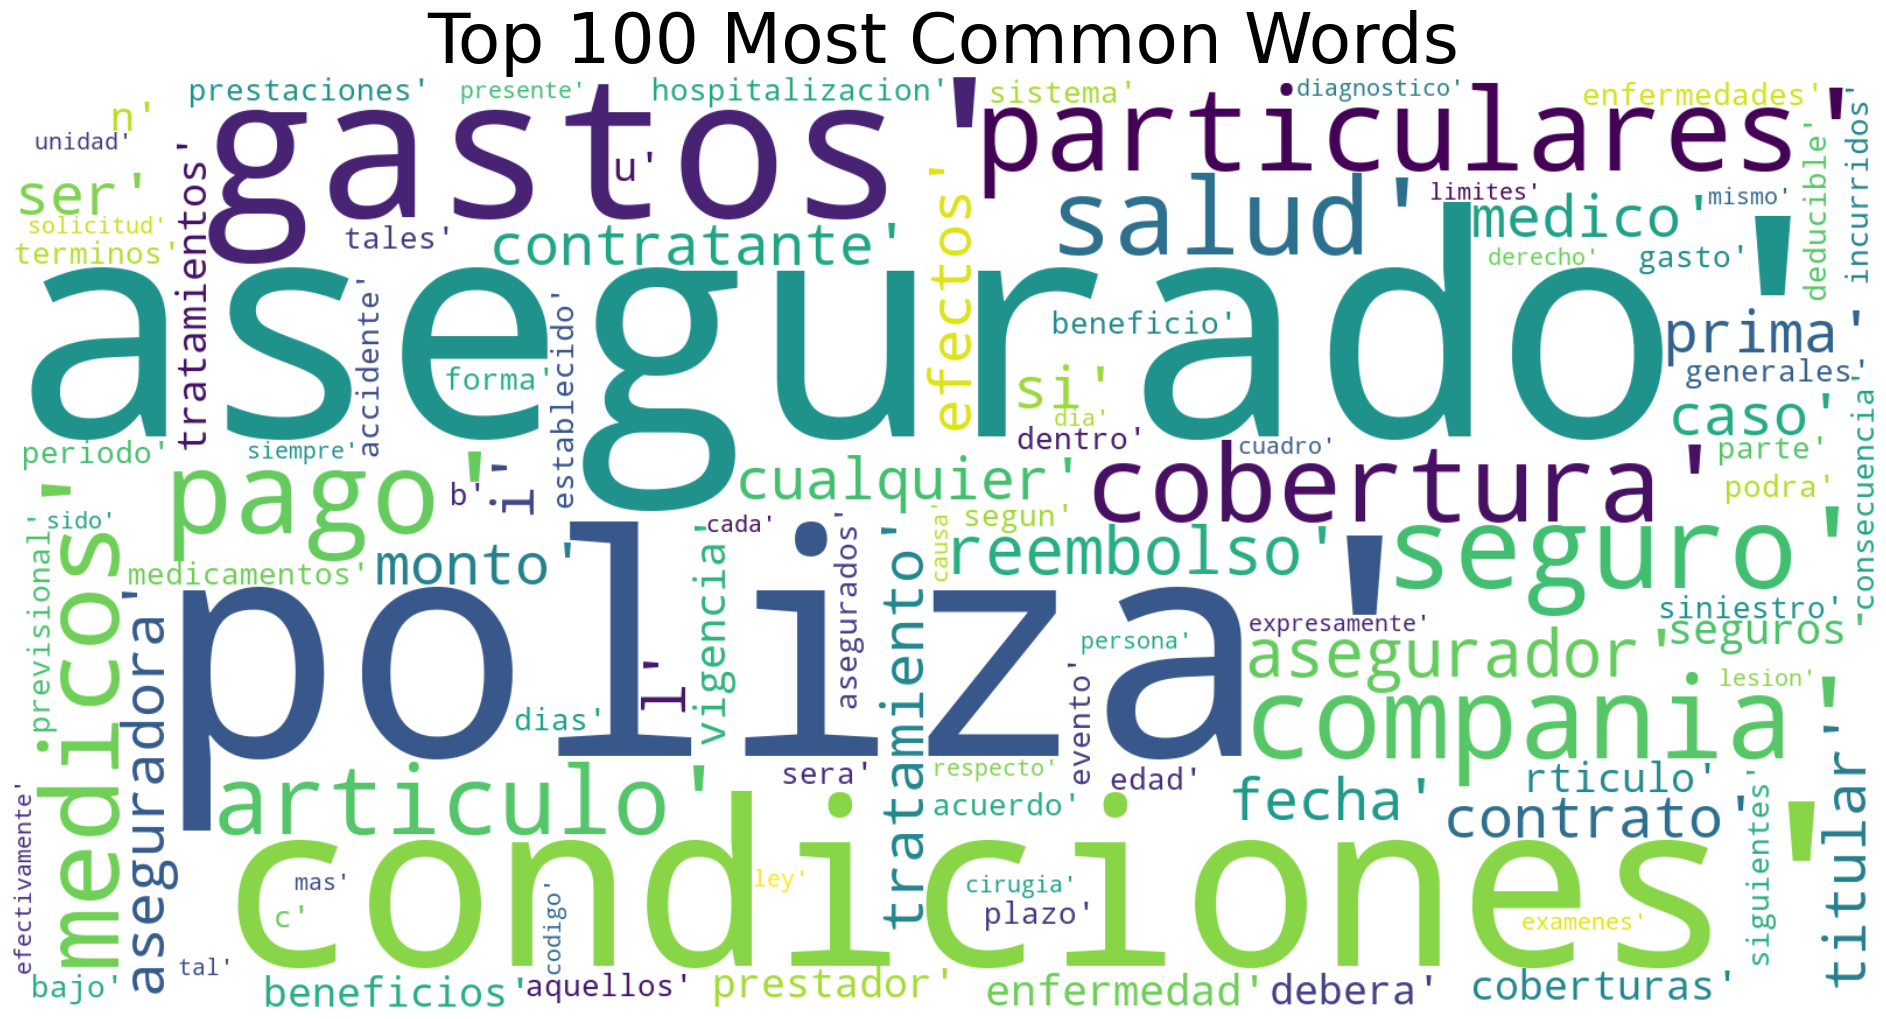

In [20]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

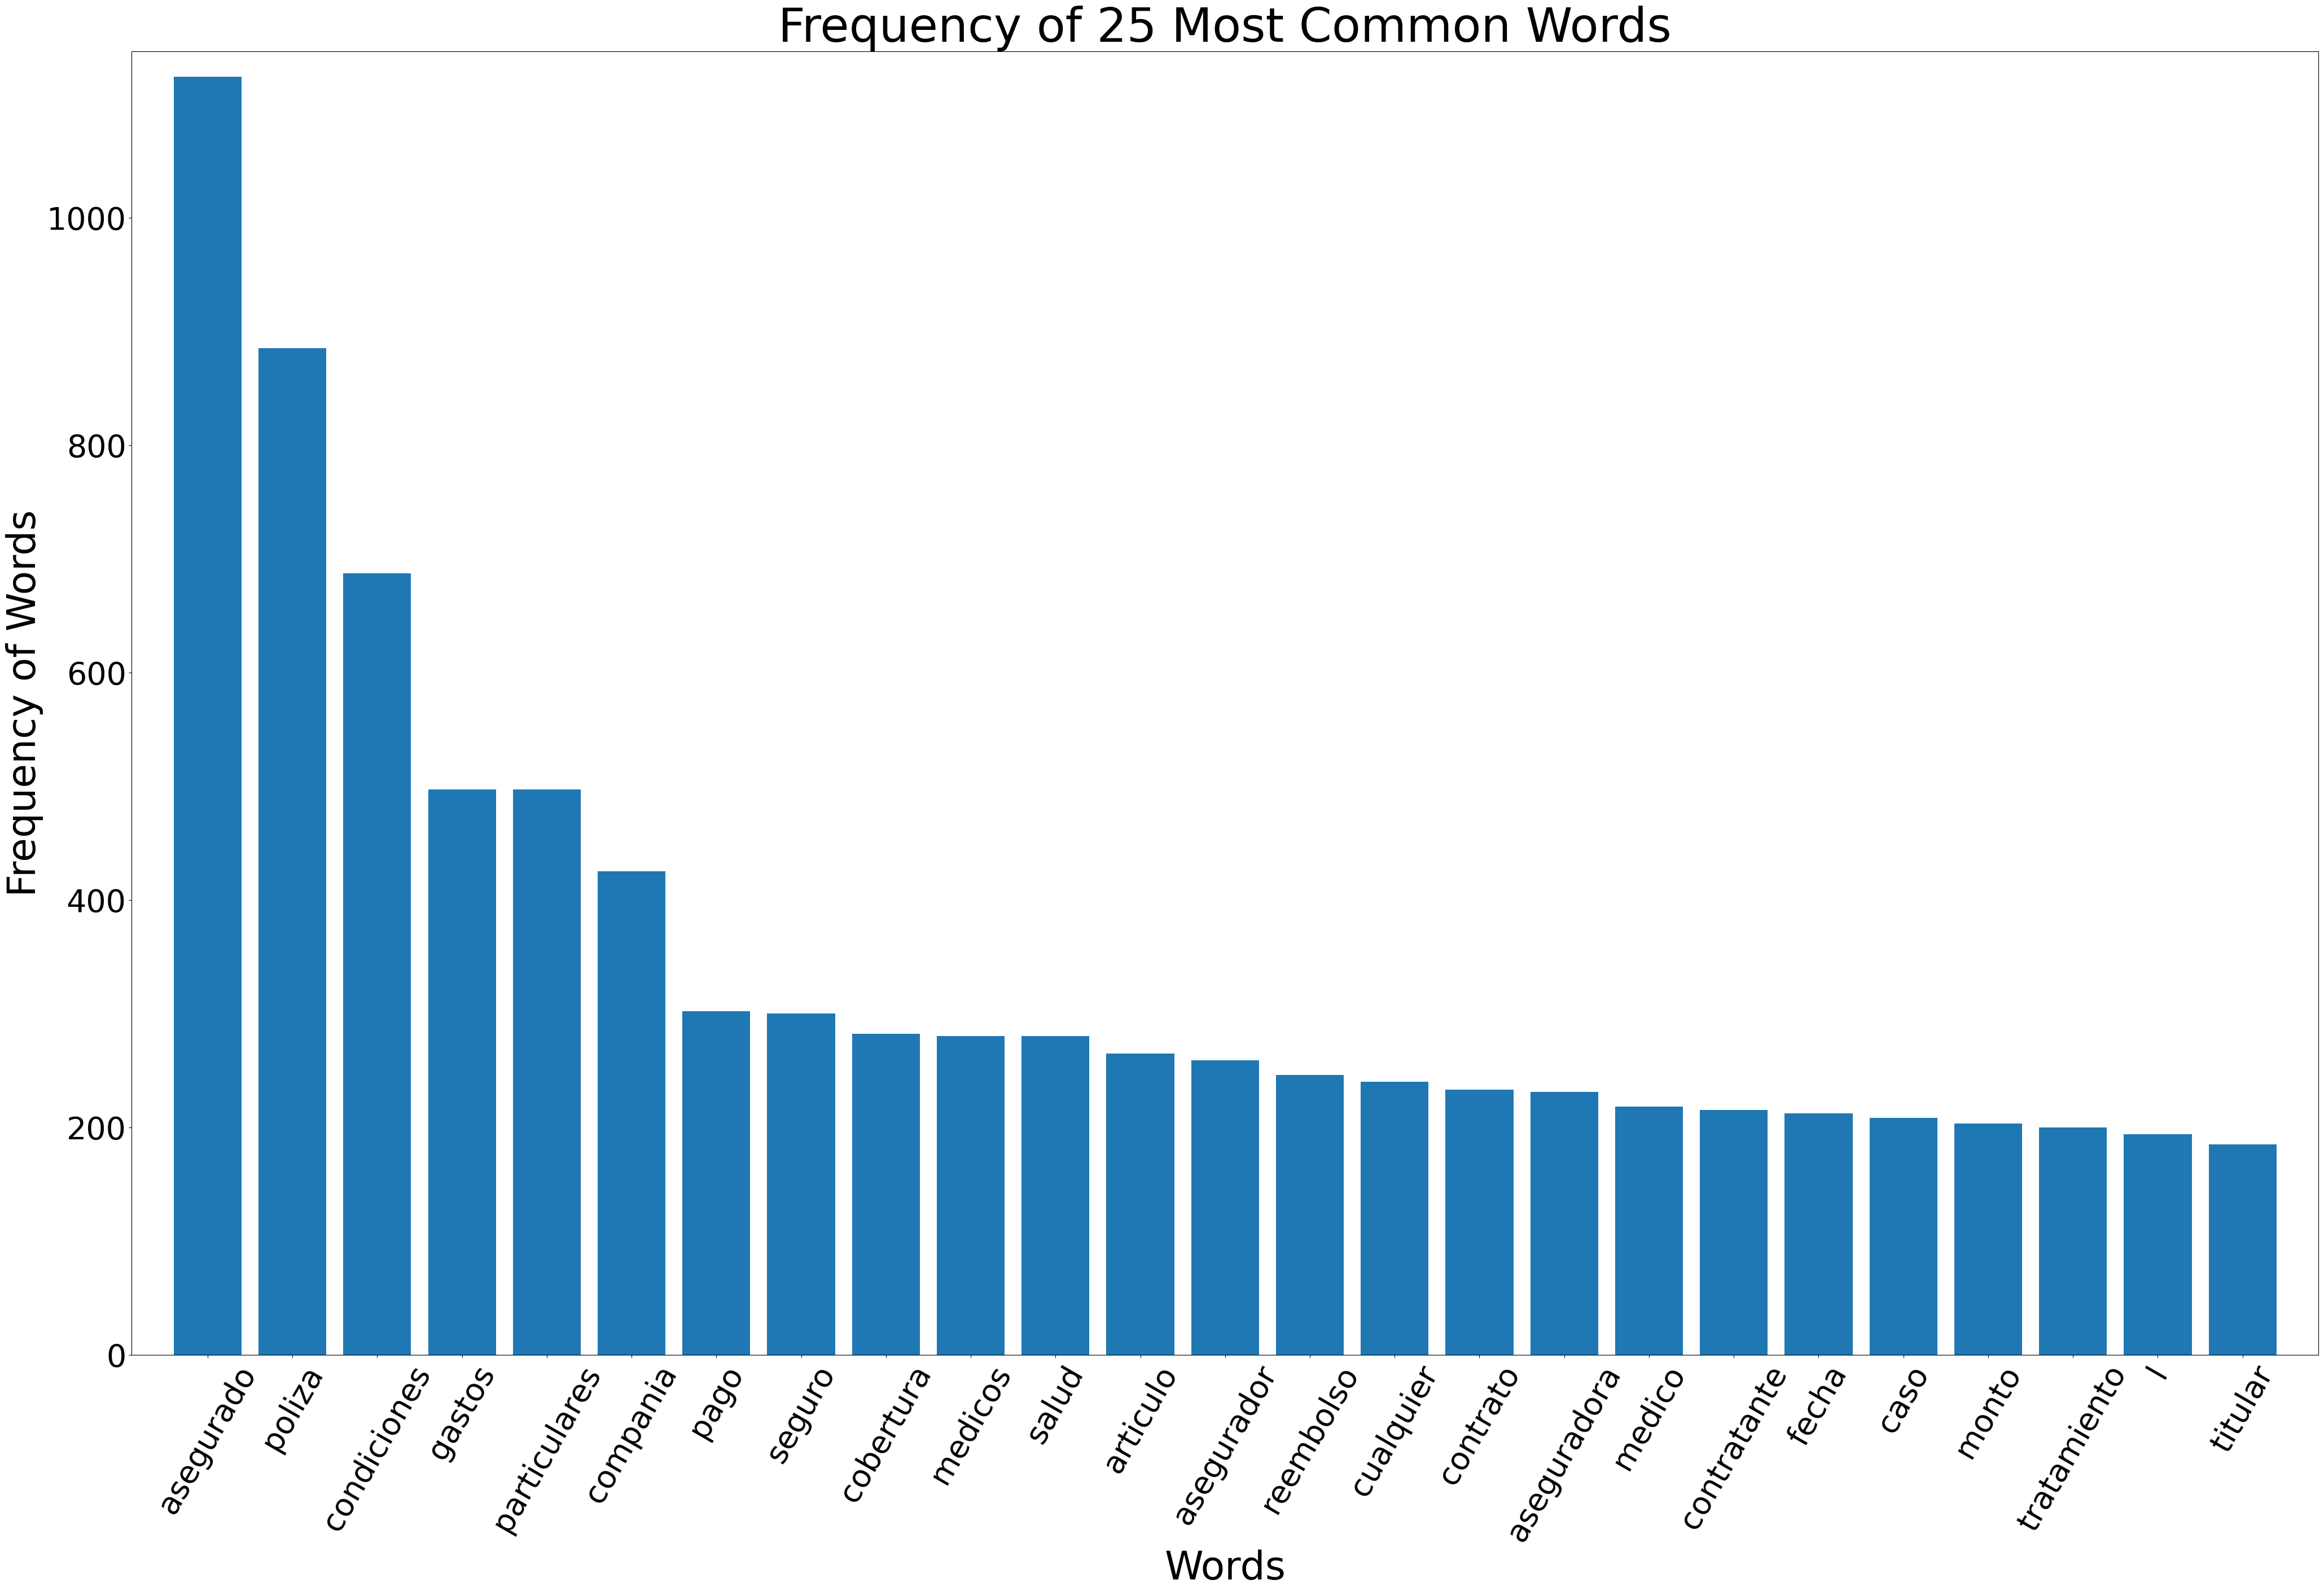

In [21]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
##pendientes: 
# extraer numeros romanos
# palabras con '
# palabras de una letra ?

###Topic modeling
### Sentiment???
#https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d